# k-means

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])

#標準化
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

#k-means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
labels = model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Challenge k-meansの結果を描画する

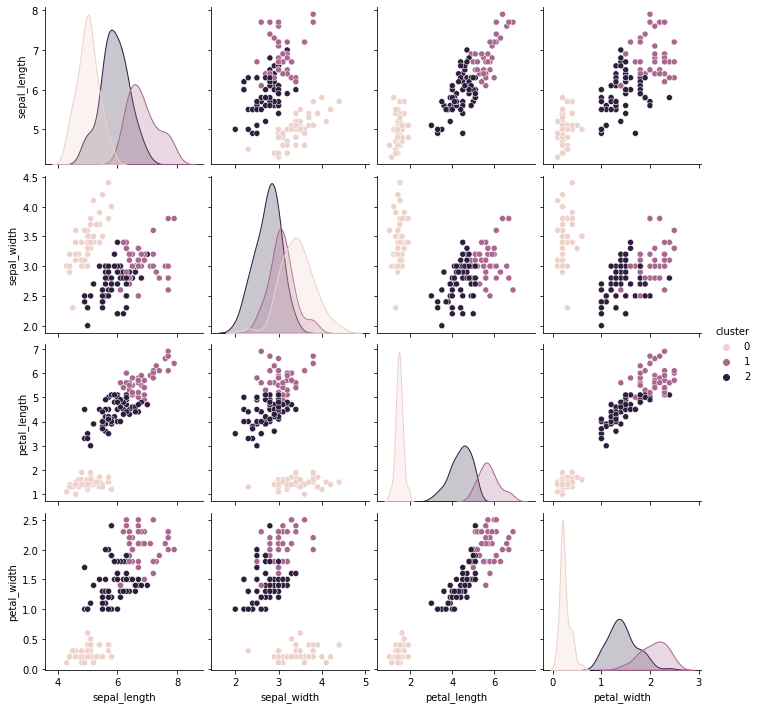

In [18]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
pred = model.fit_predict(X)

df['cluster'] = pred
model.score(X)
sns.pairplot(data=df, hue='cluster')

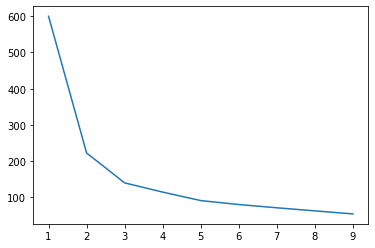

In [25]:
from sklearn.cluster import KMeans
n_clusters = 9
loss_list = []
for n in range(1, n_clusters+1):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X_scaled)
    loss_list.append(-model.score(X_scaled))

plt.plot(range(1, n_clusters+1), loss_list)

#　階層クラスタリング　cluseter.hierarchy 

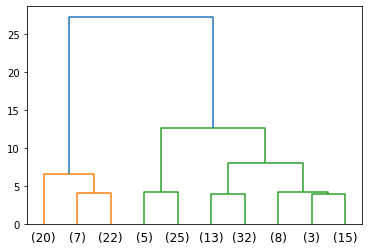

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z =  linkage(X_scaled, method='ward')
d = dendrogram(Z, truncate_mode='lastp', p=10)

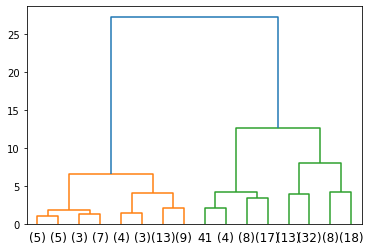

In [33]:
d = dendrogram(Z, truncate_mode='level', p=3)

# Challenge 階層クラスタリングの結果の分布を描画する

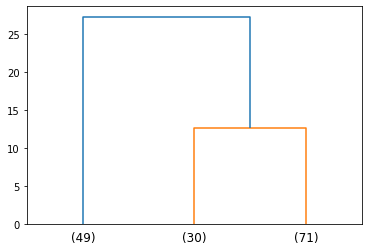

In [39]:
df = sns.load_dataset('iris')
X = df.drop(columns='species')

#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled, method='ward')
D = dendrogram(Z,truncate_mode='lastp', p=3)


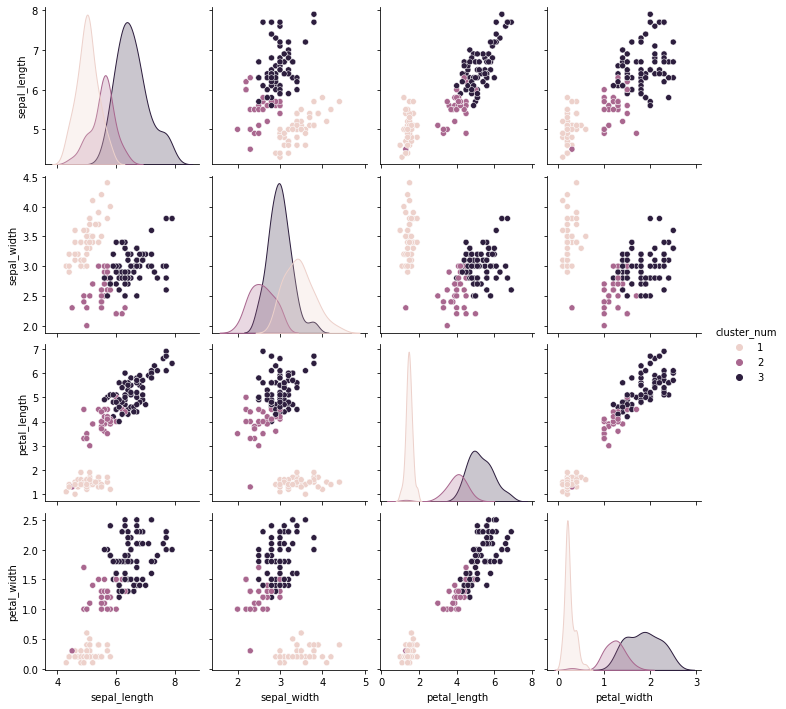

In [43]:
from scipy.cluster.hierarchy import fcluster
t = 3
X['cluster_num'] = fcluster(Z,t=t, criterion='maxclust')

sns.pairplot(data=X, hue='cluster_num')

In [46]:
#別の結合のやり方
import pandas as pd

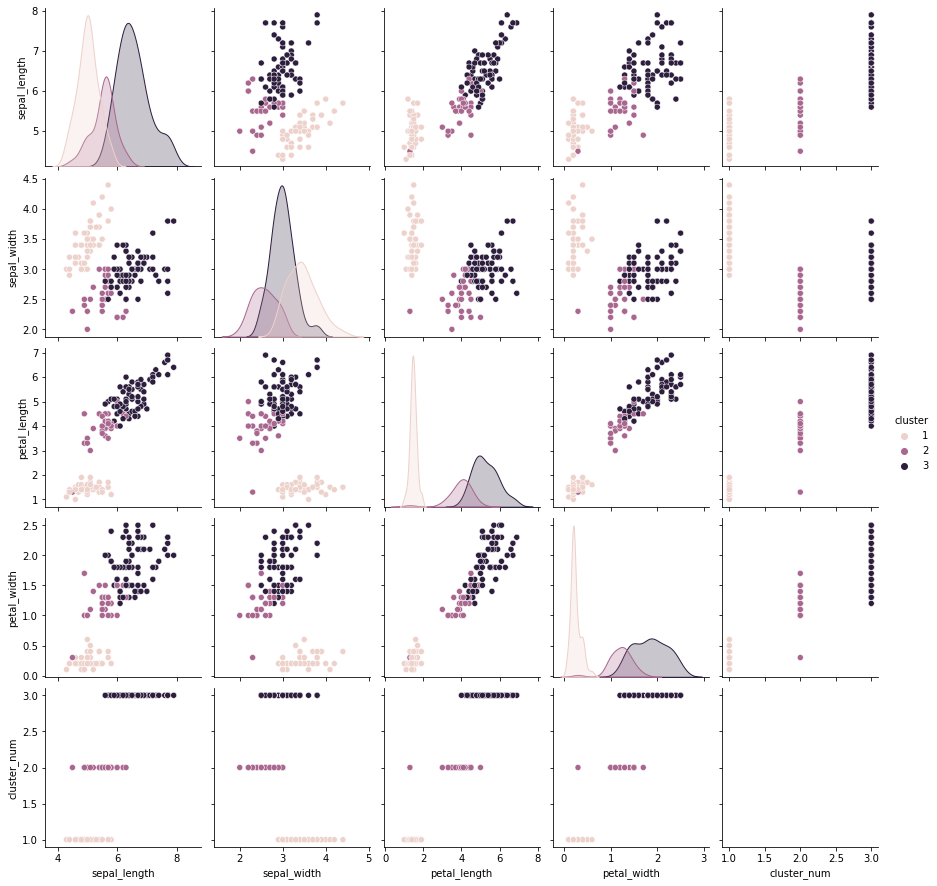

In [51]:
clusters = fcluster(Z, criterion='maxclust', t=t)
hc_result_df = pd.concat([X, pd.DataFrame({'cluster': clusters})], axis=1)
sns.pairplot(data=hc_result_df, hue='cluster')